# Case Study: Digital Marketing

My name is Xiapei Troung and I am the owner of Dianji, an online advertising company. In our business, the biggest challenge is the potential of large amounts of fake traffic, which not only affects our revenues but also gives us inaccurate data about the ads and their costs. We want to prevent this issue and were told that data science can help. Now, I do not understand much about this field but I hear it does magic. So I decided to show you the data we have and you can tell me what to do with it. We’re recruiting five teams and will hire only the best!

## 1.Exploratory and Descriptive Data Analysis 

### 1.1 Understanding the data

In [ ]:
#if using colab, keep this cell
#remove this cell if using jupyter

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series
from numpy.random import randn
import matplotlib.pyplot as plt

#data=pd.read_csv('/content/drive/Shareddrives/Case study 1/dianji.csv') #if using colab

data=pd.read_csv('D:\AUC\Fall 21\Data Science and Optimization\Case study\dianji.csv\dianji.csv') #if jupyter, uncomment and change path 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79438446 entries, 0 to 79438445
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ip               int64  
 1   app              float64
 2   device           float64
 3   os               float64
 4   channel          float64
 5   click_time       object 
 6   attributed_time  object 
 7   is_attributed    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 4.7+ GB


We have 8 features (variables):


* ip : address of a click
* app : app ID for marketing (for advertising)
* device : user’s phone
* os : user’s phone os
* channel : ID of ad publisher (showing the ad)
* click_time : time at which the user clicked on an ad
* attributed_time : time by which the app is downloaded
* is_attributed : the app is downloaded or not

**Univariate Summary:**

In [ ]:
data.describe()

,ip,app,device,os,channel,is_attributed,conversion_time
count,7.943844e+07,7.943844e+07,7.943844e+07,7.943844e+07,7.943844e+07,7.943844e+07,195813.000000
mean,8.722492e+04,1.251737e+01,3.441875e+01,2.495902e+01,2.669326e+02,2.464965e-03,106.382538
std,5.912689e+04,1.608848e+01,3.204451e+02,6.478211e+01,1.292223e+02,4.958719e-02,203.827202
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.046200e+04,3.000000e+00,1.000000e+00,1.300000e+01,1.400000e+02,0.000000e+00,1.000000
50%,8.014200e+04,1.200000e+01,1.000000e+00,1.800000e+01,2.450000e+02,0.000000e+00,7.000000
75%,1.195020e+05,1.500000e+01,1.000000e+00,1.900000e+01,3.790000e+02,0.000000e+00,108.000000
max,2.875400e+05,7.360000e+02,3.861000e+03,8.660000e+02,4.980000e+02,1.000000e+00,1432.000000


In [ ]:
Uips = data['ip'].unique()
Uapps = data['app'].unique()
Udevices = data['device'].unique()
Uos = data['os'].unique()
Uchannels = data['channel'].unique()

In [ ]:
print("number of unique IPs =", len(Uips))
print("number of unique apps=", len(Uapps))
print("number of unique devices =", len(Udevices))
print("number of unique os =", len(Uos))
print("number of unique channels =", len(Uchannels))

number of unique IPs = 162767
number of unique apps= 595
number of unique devices = 2444
number of unique os = 597
number of unique channels = 188


### 1.2 Data Wrangling & Feature Engineering

Converting time to datetime format:

In [ ]:
data.click_time = pd.to_datetime(data.click_time)
data.attributed_time = pd.to_datetime(data.attributed_time)

Adding a new column (conversion time) that represents the time taken between the ad click and the download :

In [ ]:
data['conversion_time']= (data.attributed_time - data.click_time).astype('timedelta64[m]')

Adding a new column real/fake that is initialized with R (real) for all traffic, and will change later based on our prediction algorithm

We'll add another col reason that indicates the reason if it is fake

In [ ]:
data['real/fake'] = 'R'
data['reason'] = 1

Drop rows with NaN click_time value

In [ ]:
data = data.dropna(axis=0, subset=['click_time'])

We can see below the two new column. The conversion time is in minutes.

In [ ]:
data.loc[data['is_attributed'] == 1.0]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,conversion_time,real/fake
103,204158,35.0,1.0,13.0,21.0,2017-11-06 15:41:07,2017-11-07 08:17:19,1.0,996.0,R
1504,29692,9.0,1.0,22.0,215.0,2017-11-06 16:00:02,2017-11-07 10:05:22,1.0,1085.0,R
1798,64516,35.0,1.0,13.0,21.0,2017-11-06 16:00:02,2017-11-06 23:40:50,1.0,460.0,R
2102,172429,35.0,1.0,46.0,274.0,2017-11-06 16:00:03,2017-11-07 00:55:29,1.0,535.0,R
3056,199085,35.0,1.0,13.0,274.0,2017-11-06 16:00:04,2017-11-06 23:04:54,1.0,424.0,R
...,...,...,...,...,...,...,...,...,...,...
79436984,230456,43.0,1.0,19.0,330.0,2017-11-08 03:05:48,2017-11-08 08:59:28,1.0,353.0,R
79437129,233184,10.0,1.0,61.0,113.0,2017-11-08 03:05:49,2017-11-08 03:06:20,1.0,0.0,R
79437254,225897,72.0,1.0,19.0,101.0,2017-11-08 03:05:49,2017-11-08 04:07:16,1.0,61.0,R
79437463,192075,35.0,1.0,19.0,274.0,2017-11-08 03:05:49,2017-11-08 13:42:45,1.0,636.0,R


In [ ]:
totalClicks = len(data.index)
totalAttributed = len(data.loc[data['is_attributed'] == 1.0])

In [ ]:
print("Total number of clicks =", totalClicks)
print("Total number of Attributions =", totalAttributed)
print("Overall Attribution percentage =", (totalAttributed/totalClicks)*100)


Total number of clicks = 79438445
Total number of Attributions = 195813
Overall Attribution percentage = 0.2464965168943073


So, the data shows that only 0.25 % of people who click on an ad, download the app.

This certainly raises question marks and indicates that there must be a lot of fake clicks present in the data.

In [ ]:
#IP and #clicks
#Bar chart (x=ip, y=click count)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gdata['ip'].value_counts().plot(ax=ax, kind='bar')

Getting the relationship between the app and the attribution percentage (count of clicks / count of attributions):
 

In [ ]:
appCounts = data['app'].value_counts()
appCounts

3.0      13479830
12.0     10778245
2.0       9214272
15.0      7865194
18.0      6682312
           ...   
348.0           1
271.0           1
674.0           1
650.0           1
735.0           1
Name: app, Length: 594, dtype: int64

In [ ]:
Apps_df=pd.DataFrame()
Apps_df=appCounts.to_frame( name="freq")
Apps_df.head()

,freq
3.0,13479830
12.0,10778245
2.0,9214272
15.0,7865194
18.0,6682312


In [ ]:
subset_df = data[data["is_attributed"] == 1] #data which attributed = 1
appAttrCounts = subset_df['app'].value_counts()

In [ ]:
Apps_df2=pd.DataFrame()
Apps_df2=appAttrCounts.to_frame( name="Attrfreq")
Apps_df2.head()

,Attrfreq
19.0,52175
35.0,35272
29.0,16705
10.0,14239
5.0,10627


In [ ]:
AppsDF = pd.concat([Apps_df,Apps_df2], axis=1)
AppsDF.head()

,freq,Attrfreq
0.0,810,253.0
1.0,2861615,634.0
2.0,9214272,2782.0
3.0,13479830,4559.0
4.0,43411,5.0


In [ ]:
AppsDF['Attr %'] = (AppsDF['Attrfreq']/AppsDF['freq'])*100
AppsDF.head()

,freq,Attrfreq,Attr %
0.0,810,253.0,31.234568
1.0,2861615,634.0,0.022155
2.0,9214272,2782.0,0.030192
3.0,13479830,4559.0,0.033821
4.0,43411,5.0,0.011518


In [ ]:
AppsDF['app'] = AppsDF.index
AppsDF.insert(0, 'app',AppsDF.pop('app'))

AppsDF.head()

,app,freq,Attrfreq,Attr %
,,,,
0.0,0.0,810,253.0,31.234568
1.0,1.0,2861615,634.0,0.022155
2.0,2.0,9214272,2782.0,0.030192
3.0,3.0,13479830,4559.0,0.033821
4.0,4.0,43411,5.0,0.011518


True


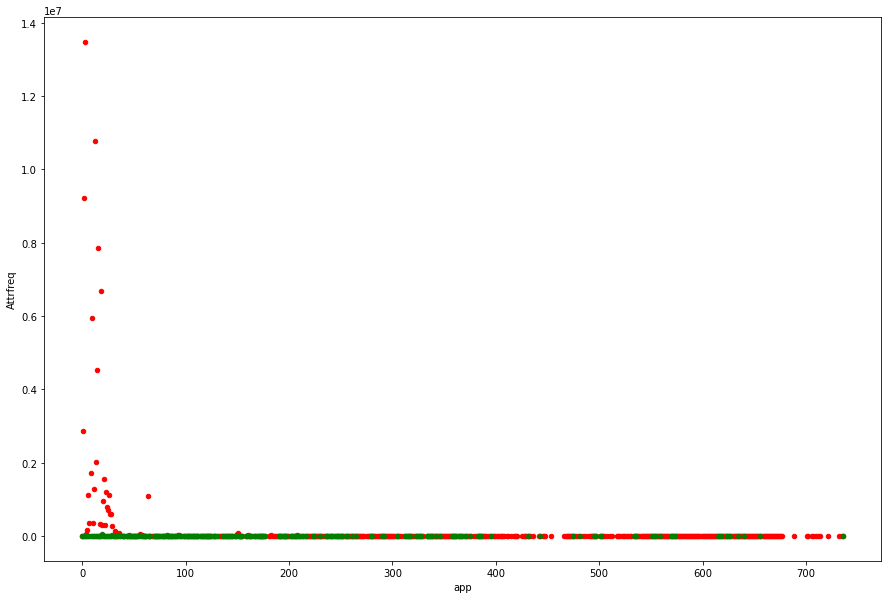

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

ax1 = AppsDF.plot(kind='scatter', x='app', y='freq', color='r')    
ax2 = AppsDF.plot(kind='scatter', x='app', y='Attrfreq', color='g', ax=ax1)    

print(ax1 == ax2)  # True

the graph above shows the total frequency of ad clicks (in red) for every app, and the total frequency of attributions (in green) for every app.
So, we can notice that there are some applications in which the click traffic is much higher than the attribution traffic, which can indicate that there might be some fraud or fake clicks.

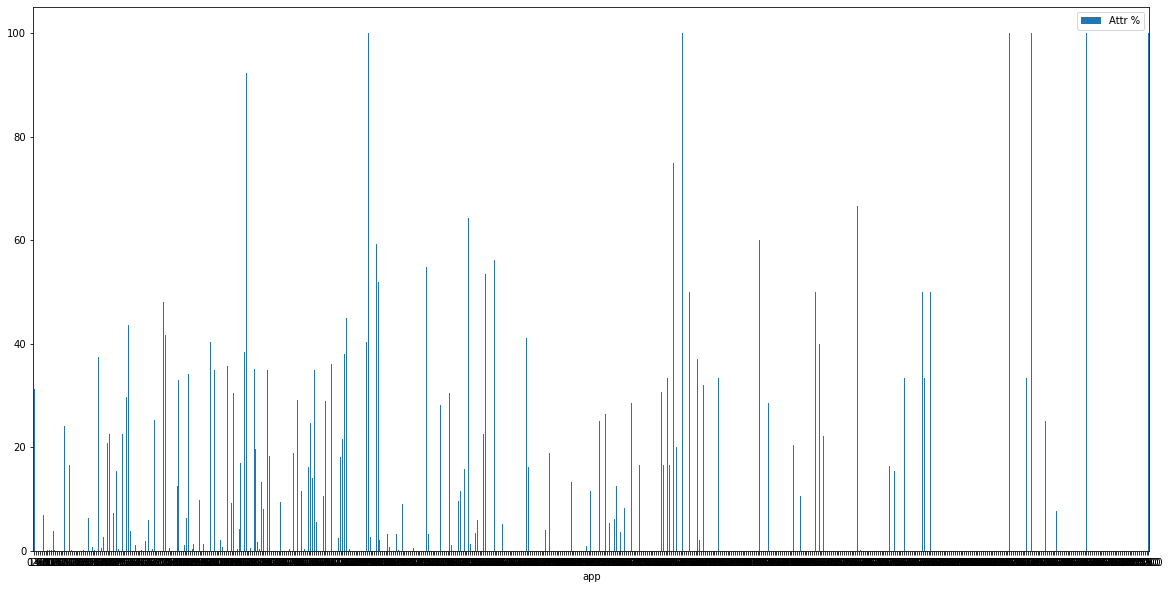

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

ax = AppsDF.plot.bar(x='app', y='Attr %', rot=0)



the graph shows each app with its attribution percentage. We can see that most of the apps have attribution percentages that are less than 50%.

## 2. Fake Traffic Cases:

### 1. Time difference between the click time and attributed time is very small -> fake downloads (not actual users)

In [ ]:
data.loc[conversion_time< 1, "real/fake"] = "F"

### 2. Sudden increase in traffic in a specific ad publisher

firsly, we will filter publishers and choose the ones which their attribution percentage is low, and we will set a threshold based on the following graph.

In [ ]:
# pick publishers where attr percentage is low 
# examine these publishers 

PublishersCounts = data['channel'].value_counts()
publish_df=pd.DataFrame()
publish_df=PublishersCounts.to_frame( name="freq")
publishAttrCounts = subset_df['channel'].value_counts()
publish_df2=pd.DataFrame()
publish_df2=publishAttrCounts.to_frame( name="Attrfreq")
PublishDF = pd.concat([publish_df,publish_df2], axis=1)
PublishDF['Attr %'] = (PublishDF['Attrfreq']/PublishDF['freq'])*100

PublishDF['channel'] = PublishDF.index
PublishDF.insert(0, 'channel',PublishDF.pop('channel'))

In [ ]:
PublishDF.head()


,channel,freq,Attrfreq,Attr %
0.0,0.0,647,45.0,6.955178
3.0,3.0,403725,150.0,0.037154
4.0,4.0,356,31.0,8.707865
5.0,5.0,3684,1773.0,48.127036
13.0,13.0,34051,9.0,0.026431


AxesSubplot(0.125,0.125;0.775x0.755)


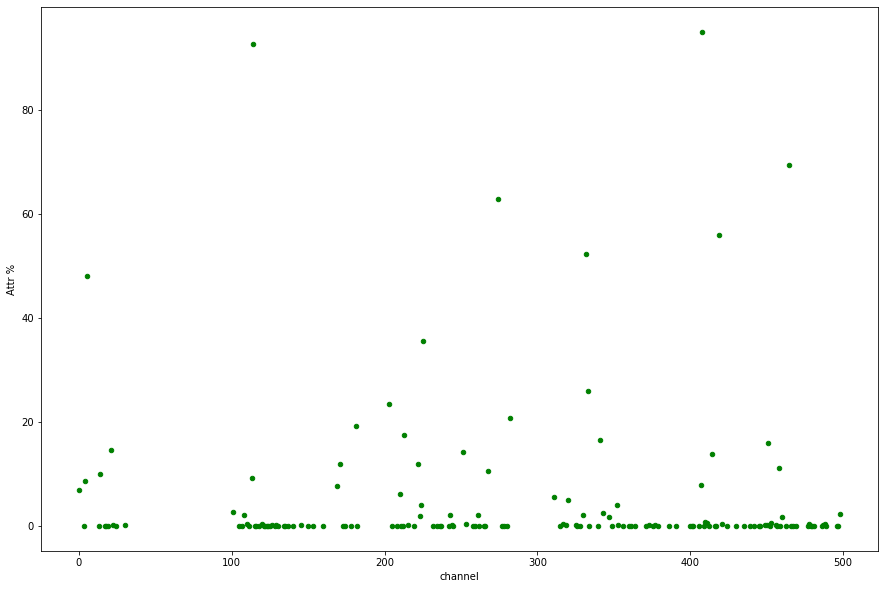

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

ax1 = PublishDF.plot(kind='scatter', x='channel', y='Attr %', color='g')    
print(ax1)


So, according to the graph, there are many publishers that have attribution percentages that are very close to zero, which means that most (nearly all) of the users who click on ads through these publishers do not download the app. For that reason, we will only examine those publishers under different times of the day and inspect if they encountered any sudden increased traffic.

In [ ]:
# Consider publishers with attribution rate < 5 %
examinedChannels = PublishDF[PublishDF["Attr %"] < 5 ]

examinedRows = data[data["channel"].isin(examinedChannels['channel']) ] #data which attributed = 1


In [ ]:
examinedRows.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,conversion_time,real/fake
0,83230,3.0,1.0,13.0,379.0,2017-11-06 14:32:21,NaT,0.0,NaN,R
1,17357,3.0,1.0,19.0,379.0,2017-11-06 14:33:34,NaT,0.0,NaN,R
2,35810,3.0,1.0,13.0,379.0,2017-11-06 14:34:12,NaT,0.0,NaN,R
3,45745,14.0,1.0,13.0,478.0,2017-11-06 14:34:52,NaT,0.0,NaN,R
4,161007,3.0,1.0,13.0,379.0,2017-11-06 14:35:08,NaT,0.0,NaN,R


In [ ]:
len(examinedChannels.index)

132

In [ ]:
examinedRows['Click_Hour'] = examinedRows['click_time'].apply(lambda x: x.hour)


In [ ]:
examinedRows['Click_Date'] = examinedRows['click_time'].apply(lambda x: x.date())


In [ ]:
#heat map: x is every hour 
#y is publishers under examination 
#color is click frequency

In [ ]:

import pandas as pd
import numpy as np
from pandas import Series
from numpy.random import randn
import matplotlib.pyplot as plt

data=pd.read_csv('dianji.csv', error_bad_lines=False)

data['real/fake'] = 'R'

We want to find Multiple clicks by same (device+os+ip) at around same time (Threshold = 1 min) without attribution


First, Select only useful columns that are not attributed

non_attr = data[(data["is_attributed"] < 1.0) & (data["real/fake"] != 'F')]
uniques = non_attr[["ip", "device", "os","click_time"]]

Next, we want to find for each unique (ip,device,os) if more than 20 clicks without attribution then potential fake

First, group same ip,device and os. Then, for entries duplicated more than 20 times (+20 clicks), add to fake counter to get the fake traffic amount coming from this premise. Then, label them in the main dataframe.

data_count = uniques.groupby(['ip', 'device', 'os']).size()
fake_counter = 0
for items in data_count.iteritems():
    if items[1] > 20:
        fake_counter = fake_counter + 1
        if fake_counter < 1000: print(items)
        data.loc[[data.ip == items[0][0], data.device == items[0][1], data.os == items[0][2]], 'real/fake'] = "F"
print(fake_counter)

We now know that 585,942 of the entries were fake because of the current reason and labeled them. Now, remove redundant df.

del uniques
del non_attr

Now, let us visualize what we achieved

Percentage of real/Fake Traffic (Pie Chart)

#Data Sum
sum_Data = data.sum()

# Dataset
million = 1000000
pilabels = ['Real Traffic', 'Fake Taffic']
count_Fake = data[(data.real/fake != 'R') & (data["real/fake"] != 'F')].sum()
count_Real = sum_Data - count_Fake
diagram1_data = [count_Real/million, count_Fake/million]

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:.1f} Million Clicks)".format(pct, absolute)

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.title('Web Traffic Analysis')

plt.pie(diagram1_data, labels = pilabels, autopct=lambda pct: func(pct,diagram1_data))

# show plot
plt.show()

Percentage of attributed/non Attributed (Pie Chart) from real traffic

# Dataset
pilabels = ['Attributed', 'Non-Attributed']
count_attr = data[(data.is_attributed > 0.0) & (data["real/fake"] != 'F')].sum()
count_non_attr = sum_Data - count_attr
diagram2_data = [count_attr/million, count_non_attr/million]

# Creating plot
fig2 = plt.figure(figsize =(10, 7))
plt.title('Web Traffic Analysis')

plt.pie(diagram2_data, labels = pilabels, autopct=lambda pct: func(pct,diagram2_data))

# show plot
plt.show()

Top 5 Channels with highest Conversions

top_perc = data.groupby(['channel']).count()
top_perc['attribution_per'] = top_perc['attributed_time']/top_perc['click_time']*100
top_perc = top_perc[["click_time","attributed_time", 'attribution_per']]
top_perc = top_perc.reset_index()
top_perc = top_perc.nlargest(n=10, columns = 'attribution_per')
top_perc['channel'] = top_perc['channel'].astype(str)
top_perc.plot.bar(x='channel', y='attribution percentage')

###3. an IP address with a bunch of click timestamps but no action timestamps - not time constrained (Same IP visiting multiple ads with multiple channels but no attribution)


In [ ]:
non_attr = data[data["is_attributed"] == 0]
uniques = non_attr[['ip', 'app', 'channel']]

In [ ]:
data_count = uniques.groupby(['ip', 'app']).size()
data_count

ip      app 
5       2.0     4
        3.0     5
        6.0     1
        9.0     1
        12.0    1
               ..
287540  9.0     5
        12.0    4
        14.0    1
        15.0    4
        18.0    1
Length: 2377179, dtype: int64

In [ ]:
fake_counter = 0
for items in data_count.iteritems():
    if items[1] > 20:
        fake_counter += 1
        data.loc[[data.ip == items[0][0], data.app == items[0][1], 'real/fake'] = "F"
fake_counter

544054

### 4. Multiple clicks by same (device+os+ip) without attribution

First, Select only useful columns that are not attributed

In [ ]:
non_attr = data[(data["is_attributed"] < 1.0) & (data["real/fake"] != 'F')]
uniques = non_attr[["ip", "device", "os","click_time"]]

Next, we want to find for each unique (ip,device,os) if more than 20 clicks without attribution then potential fake

First, group same ip,device and os. Then, for entries duplicated more than 20 times (+20 clicks), add to fake counter to get the fake traffic amount coming from this premise. Then, label them in the main dataframe.

In [ ]:
data_count = uniques.groupby(['ip', 'device', 'os']).size()
fake_counter = 0
for items in data_count.iteritems():
    if items[1] > 20:
        fake_counter = fake_counter + 1
        if fake_counter < 1000: print(items)
        data.loc[[data.ip == items[0][0], data.device == items[0][1], data.os == items[0][2]], 'real/fake'] = "F"
print(fake_counter)

We now know that 585,942 of the entries were fake because of the current reason and labeled them. Now, remove redundant df.

In [ ]:
del uniques
del non_attr

Now, let us visualize what we have achieved

### Data Visualization

Percentage of real/Fake Traffic (Pie Chart)

In [ ]:
#Data Sum
sum_Data = data.sum()

In [ ]:
# Dataset
million = 1000000
pilabels = ['Real Traffic', 'Fake Taffic']
count_Fake = data[(data.real/fake != 'R') & (data["real/fake"] != 'F')].sum()
count_Real = sum_Data - count_Fake
diagram1_data = [count_Real/million, count_Fake/million]

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:.1f} Million Clicks)".format(pct, absolute)

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.title('Web Traffic Analysis')

plt.pie(diagram1_data, labels = pilabels, autopct=lambda pct: func(pct,diagram1_data))

# show plot
plt.show()

Percentage of attributed/non Attributed (Pie Chart) from real traffic

In [ ]:
# Dataset
pilabels = ['Attributed', 'Non-Attributed']
count_attr = data[(data.is_attributed > 0.0) & (data["real/fake"] != 'F')].sum()
count_non_attr = sum_Data - count_attr
diagram2_data = [count_attr/million, count_non_attr/million]

# Creating plot
fig2 = plt.figure(figsize =(10, 7))
plt.title('Web Traffic Analysis')

plt.pie(diagram2_data, labels = pilabels, autopct=lambda pct: func(pct,diagram2_data))

# show plot
plt.show()

Top 5 Channels with highest Conversions

In [ ]:
top_perc = data.groupby(['channel']).count()
top_perc['attribution_per'] = top_perc['attributed_time']/top_perc['click_time']*100
top_perc = top_perc[["click_time","attributed_time", 'attribution_per']]
top_perc = top_perc.reset_index()
top_perc = top_perc.nlargest(n=10, columns = 'attribution_per')
top_perc['channel'] = top_perc['channel'].astype(str)
top_perc.plot.bar(x='channel', y='attribution percentage')

In [ ]:
data_without_fake = data.loc[df['real/fake'] == 'R']
data_without_fake 

In [ ]:
top_perc = data_without_fake.groupby(['channel']).count()
top_perc['attribution_per'] = top_perc['attributed_time']/top_perc['click_time']*100
top_perc = top_perc[["click_time","attributed_time", 'attribution_per']]
top_perc = top_perc.reset_index()
top_perc = top_perc.nlargest(n=10, columns = 'attribution_per')
top_perc['channel'] = top_perc['channel'].astype(str)
top_perc.plot.bar(x='channel', y='attribution percentage')

### OTHER